In [1]:
#importing all necessary modules

%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

#Reading the preprocessed data into final
final = sqlite3.connect('C:\\Users\\tulasi ram\\Desktop\\amazon_food_reviews\\final.sqlite')

C:\Users\tulasi ram\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
final_data=pd.read_sql_query("""SELECT * FROM Reviews """, final)

In [3]:
final_data.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,WordCount
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...,35
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...,27
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...,15
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,b'great littl book read nice rhythm well good ...,50
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,b'book poetri month year goe month cute littl ...,37


In [4]:
#Sampling the data points
i = np.random.choice(np.arange(final_data.shape[0]), 10000, replace=False)
sampled_data = final_data.loc[i]
print(sampled_data.shape)
#sorting the values based on time
sampled_data=sampled_data.sort_values(by=['Time'])
sampled_data.head()

(10000, 13)


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,WordCount
299,346105,374411,B00004CI84,A1CAA94EOP0J2S,Travis J Smith,4,4,positive,1036022400,Great Comedy,Beetlejuice is the story of ghosts (Alec Baldw...,b'beetlejuic stori ghost alec baldwin geena da...,76
3010,223527,242382,B0000CNU0A,ALYOQ8324079Y,"Maddi Hausmann Sojourner ""madhaus""",9,9,positive,1070236800,instant Japanese soup base,"Not as quick as those classic Herb-ox cubes, b...",b'quick classic cube stuff give authent japane...,38
3348,408080,441319,B0000D9N17,A3OMD9I5JK8NFE,baby test,29,34,positive,1071100800,A great way to learn about different flavors,This is a great way of learning about differen...,b'great way learn differ chees flavor gorgonzo...,60
5365,94024,102216,B0000GH6UG,A1J2NULS2YDNAQ,Matt Cromwell,8,12,positive,1073692800,Chocolate Like You've Never Had It!,I was first turned onto this chocolate when I ...,b'first turn onto chocol visit privat mexican ...,98
4172,195834,212291,B0000DGFAC,A18OE4IVSZMZ8E,"Sheri Johnson ""sherilees""",31,34,negative,1075420800,Would I have bought if had seen?,The plant is very healthy. It arrived quickly ...,b'plant healthi arriv quick good shape disappo...,26


In [5]:
#Bow
bow_vectors=CountVectorizer().fit_transform(sampled_data['Text'].values)
print(bow_vectors.shape)

(10000, 20908)


In [6]:
final_bow=bow_vectors.toarray()#converting into numpy array 
labels=sampled_data['Score']

**Applying k-NN on Bag Of Words vectors using brute force algorithm  **

In [7]:
#final_bow is the vector converted from text using technique Bag Of Words
#labels is the class label
#Splitting the data set into train and test
X_1, X_test, Y_1, Y_test = cross_validation.train_test_split(final_bow, labels, test_size=0.3, random_state=0)
#10-fold cross validation

# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores=[]



In [8]:
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i,algorithm='brute')
    scores=cross_val_score(knn, X_1 , Y_1 , cv=10 , scoring='accuracy')#cross_val_scores returns 10 scores.
    cv_scores.append(scores.mean())


[0.806713391251819, 0.83457054460461, 0.8421425868799151, 0.8434285072884988, 0.8427138128270233, 0.8432858545192365, 0.8432858539361451, 0.8437144259478082, 0.8437144259478082, 0.843714425947808, 0.8435717731785459, 0.843714630321403, 0.8435717731785457, 0.8431432017499745, 0.8431432017499745]


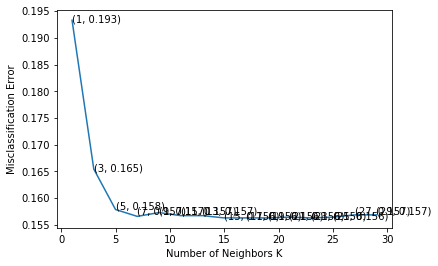


The optimal number of neighbors is 23.
the misclassification error for each k value is :  [0.193 0.165 0.158 0.157 0.157 0.157 0.157 0.156 0.156 0.156 0.156 0.156
 0.156 0.157 0.157]


In [11]:
print(cv_scores)
# changing to misclassification error   
MSE = [1-x for x in cv_scores] 

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#computing optimal k
optimal_k=neighbors[MSE.index(min(MSE))]

print('\nThe optimal number of neighbors is %d.' % optimal_k)


print("the misclassification error for each k value is : ", np.round(MSE,3))

In [10]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_1, Y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 23 is 83.266667%


In [23]:
#Sampling the data points
i = np.random.choice(np.arange(final_data.shape[0]), 4000, replace=False)
sampled_data = final_data.loc[i]
print(sampled_data.shape)
#sorting the values based on time
sampled_data=sampled_data.sort_values(by=['Time'])
sampled_data.head()

(4000, 13)


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,WordCount
241,1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,961718400,Great Product,This was a really good idea and the final prod...,b'realli good idea final product outstand use ...,17
5907,61299,66610,B0000SY9U4,A3EEDHNHI4WNSH,Joanna J. Young,23,23,positive,1067472000,Yummy,"If you've never tried Kona coffee, Aloha Islan...",b'youv never tri kona coffe aloha island defin...,85
6381,409953,443373,B0000U1OFU,AFKKVFJ2DS4EL,Jonathan R. Pauling,0,1,positive,1068076800,Righteous Hot Sauce,I just love this sauce. I put in on everything.,b'love sauc put everyth',4
6279,250486,271595,B0000TU8VM,A3CBHCE5OH4P8V,Chris Chiquoine,5,6,positive,1068249600,Unique and delicious,"A piquant, sweet, colorful treat. Don't be pu...",b'piquant sweet color treat dont put hot desig...,18
5821,381398,412394,B0000SWZX2,AHRB89BJ5QF78,Helen Lenoir,3,4,positive,1069372800,loved the aroma,I can recommend this coffee. It smells like th...,b'recommend coffe smell like coffe aroma paris...,19


In [24]:
#Bow
bow_vectors=CountVectorizer().fit_transform(sampled_data['Text'].values)
print(bow_vectors.shape)

(4000, 13631)


In [25]:
final_bow=bow_vectors.toarray()#converting into numpy array 
labels=sampled_data['Score']

**Applying k-NN on Bag Of Words vectors using kd-tree algorithm  **

In [26]:
#final_bow is the vector converted from text using technique Bag Of Words
#labels is the class label
#Splitting the data set into train and test
X_1, X_test, Y_1, Y_test = cross_validation.train_test_split(final_bow, labels, test_size=0.3, random_state=0)
#10-fold cross validation

# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores=[]



In [27]:
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
    scores=cross_val_score(knn, X_1 , Y_1 , cv=10 , scoring='accuracy')#cross_val_scores returns 10 scores.
    cv_scores.append(scores.mean())


[0.8121503144172758, 0.8307104135803481, 0.8403609967692736, 0.8453636024876412, 0.8450038994666477, 0.8450039085775511, 0.8446429436964393, 0.8450013666355074, 0.8450013666355074, 0.8453597804636722, 0.8453597804636722, 0.8453597804636722, 0.8450026376065294, 0.8453597804636722, 0.8457182034027403]


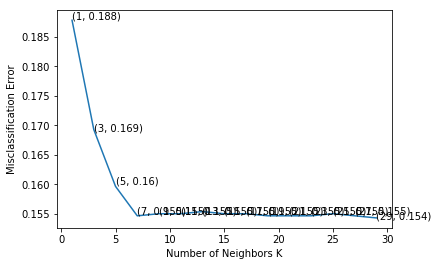


The optimal number of neighbors is 29.
the misclassification error for each k value is :  [0.188 0.169 0.16  0.155 0.155 0.155 0.155 0.155 0.155 0.155 0.155 0.155
 0.155 0.155 0.154]


In [28]:
print(cv_scores)
#changing to misclassification error   
MSE = [1-x for x in cv_scores] 

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#computing optimal k
optimal_k=neighbors[MSE.index(min(MSE))]

print('\nThe optimal number of neighbors is %d.' % optimal_k)


print("the misclassification error for each k value is : ", np.round(MSE,3))

In [29]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_1, Y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 29 is 85.250000%


**INFERENCE**

*It seems that kd_tree algorithm has more accuracy than brute force in Bag Of Words vectors.*

**TF-IDF**

In [4]:
#Sampling the data points
i = np.random.choice(np.arange(final_data.shape[0]), 3000, replace=False)
sampled_data = final_data.loc[i]
print(sampled_data.shape)
sampled_data=sampled_data.sort_values(by=['Time'])
sampled_data.head()

(3000, 13)


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,WordCount
6922,475739,514467,B0000VZ0F4,A2GANR9I6XHTU9,Amy Lynn,5,5,positive,1081209600,Starbucks is the best,"So far ive tried the breakfest blend, columbia...",b'far ive tri breakfest blend columbian sumatr...,57
7814,351808,380554,B00014DXCC,A3OJ5D1THAJKYY,Southern Belle,0,5,negative,1084665600,Add honey?,Are you supposed to avoid sugars if you have a...,b'suppos avoid sugar urinari tract infect',6
16037,413263,446947,B0002HMAEA,A31OKMZS1A8ZVL,"Hugo Darien ""Daniel""",0,10,positive,1092355200,good,this information is good i just wonder is this...,b'inform good wonder best medicin herb earth o...,13
2681,494235,534333,B0000CEQ72,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",1,1,positive,1093651200,Bob's Red Mill Whole Wheat Flour,"""We use and believe in stone milling because n...",b'use believ stone mill machineri yet develop ...,323
22819,28673,31272,B0006NWEGE,A3OUXR87W8IMCA,"L. Spadafora ""Lori""",2,2,positive,1104019200,This is the greatest!,I gave this to my brother for Christmas and it...,b'gave brother christma big hit instrument wel...,31


In [5]:
#TF-IDF
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1))
final_tf_idf = tf_idf_vect.fit_transform(sampled_data['Text'].values)
print(final_tf_idf.shape)
final_tf_idf=final_tf_idf.toarray()
labels=sampled_data['Score']

(3000, 12021)


In [6]:
#final_tf_idf is the vector converted from text using technique TF-IDF
#labels is the class label
#Splitting the data set into train and test
X_1, X_test, Y_1, Y_test = cross_validation.train_test_split(final_tf_idf, labels, test_size=0.3, random_state=0)
#10-fold cross validation

# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores_tf_idf=[]



**Applying k-NN on TF-IDF vectors using brute force algorithm  **

In [7]:
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i,algorithm='brute')
    scores=cross_val_score(knn, X_1 , Y_1 , cv=10 , scoring='accuracy')#cross_val_scores returns 10 scores.
    cv_scores_tf_idf.append(scores.mean())


[0.8052549728478888, 0.8462080880788788, 0.8466752512474637, 0.8504825830193752, 0.8476253753729435, 0.8485800347486553, 0.8481128931765001, 0.8476367027003097, 0.846201296001745, 0.8452443582027019, 0.8447681677265114, 0.8447681677265114, 0.8447681677265114, 0.8442942340772224, 0.8442942340772224]

The optimal number of neighbors is 7.


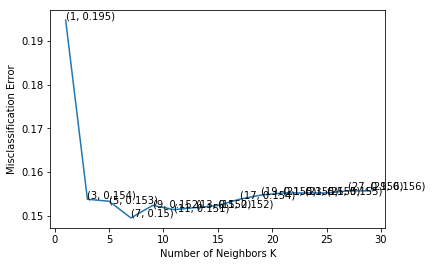


the misclassification error for each k value is :  [0.195 0.154 0.153 0.15  0.152 0.151 0.152 0.152 0.154 0.155 0.155 0.155
 0.155 0.156 0.156]


In [8]:
# changing to misclassification error   
print(cv_scores_tf_idf)
MSE = [1-x for x in cv_scores_tf_idf] 

#computing optimal k
optimal_k=neighbors[MSE.index(min(MSE))]

print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


print("\nthe misclassification error for each k value is : ", np.round(MSE,3))

In [9]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_1, Y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 7 is 85.000000%


In [5]:
#TF-IDF
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1))
final_tf_idf = tf_idf_vect.fit_transform(sampled_data['Text'].values)
print(final_tf_idf.shape)
final_tf_idf=final_tf_idf.toarray()
labels=sampled_data['Score']

(3000, 11789)


In [6]:
#final_tf_idf is the vector converted from text using technique TF-IDF
#labels is the class label
#Splitting the data set into train and test
X_1, X_test, Y_1, Y_test = cross_validation.train_test_split(final_tf_idf, labels, test_size=0.3, random_state=0)
#10-fold cross validation

# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores_tf_idf=[]



**Applying k-NN on TF-IDF vectors using kdtree algorithm  **

In [7]:
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
    scores=cross_val_score(knn, X_1 , Y_1 , cv=10 , scoring='accuracy')#cross_val_scores returns 10 scores.
    cv_scores_tf_idf.append(scores.mean())


[0.7961895907368594, 0.8366818813513749, 0.8528701007149498, 0.8585912001027991, 0.8595413026318489, 0.8557204083020995, 0.8547657705228172, 0.8566705324275791, 0.8557181514751981, 0.8542895800466267, 0.8542895800466267, 0.8542895800466267, 0.8542895800466267, 0.8542895800466267, 0.8542895800466267]

The optimal number of neighbors is 9.


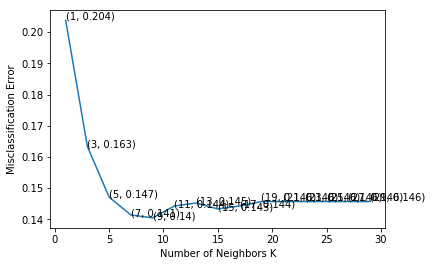


the misclassification error for each k value is :  [0.204 0.163 0.147 0.141 0.14  0.144 0.145 0.143 0.144 0.146 0.146 0.146
 0.146 0.146 0.146]


In [8]:
# changing to misclassification error   
print(cv_scores_tf_idf)
MSE = [1-x for x in cv_scores_tf_idf] 

#computing optimal k
optimal_k=neighbors[MSE.index(min(MSE))]

print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


print("\nthe misclassification error for each k value is : ", np.round(MSE,3))

In [9]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_1, Y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 9 is 84.666667%


**INFERENCE**

*It seems that brute force algorithm has almost same accuracy as kd tree in TF-IDF vectors.*

**Applying k-NN on W2V vectors using brute force algorithm**

In [5]:
#Sampling the data points
i = np.random.choice(np.arange(final_data.shape[0]), 10000, replace=False)
sampled_data_w2v = final_data.loc[i]
print(sampled_data_w2v.shape)
sampled_data_w2v=sampled_data_w2v.sort_values(by=['Time'])
sampled_data_w2v.head()
labels=sampled_data_w2v['Score']

(10000, 13)


In [6]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


In [7]:

# Train our own Word2Vec model using our own text corpus
# cleaning the word of any html-tags
#cleaning the word of any punctuation or special characters
import gensim
i=0
list_of_sent=[]
for sent in sampled_data_w2v['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
    

C:\Users\tulasi ram\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [8]:
#Word2Vec
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)    


In [9]:
#AvgW2V Model
sent_vectors = []; 
for sent in list_of_sent: 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

In [10]:
#sent_vectors is the vector converted from text using technique Word2Vec
#labels is the class label
#Splitting the data set into train and test
X_1, X_test, Y_1, Y_test = cross_validation.train_test_split(sent_vectors, labels, test_size=0.3, random_state=0)
#10-fold cross validation

# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores_w2v=[]



In [11]:
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i,algorithm='brute')
    scores=cross_val_score(knn, X_1 , Y_1 , cv=10 , scoring='accuracy')#cross_val_scores returns 10 scores.
    cv_scores_w2v.append(scores.mean())

[0.7774280119522109, 0.8204266443109359, 0.8342872807612143, 0.8428579035000947, 0.8458581125384221, 0.8481421988324758, 0.8477132198228977, 0.8495715906708847, 0.8492856714284839, 0.8481430163268554, 0.8477132192398061, 0.8467146469395127, 0.8475717915459302, 0.847857506414736, 0.8475715877554271]


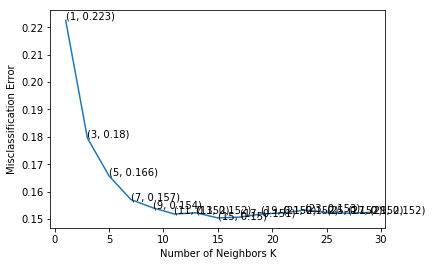


The optimal number of neighbors is 15.

the misclassification error for each k value is :  [0.223 0.18  0.166 0.157 0.154 0.152 0.152 0.15  0.151 0.152 0.152 0.153
 0.152 0.152 0.152]


In [12]:
# changing to misclassification error
print(cv_scores_w2v)
MSE = [1-x for x in cv_scores_w2v] 
# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#computing optimal k
optimal_k=neighbors[MSE.index(min(MSE))]

print('\nThe optimal number of neighbors is %d.' % optimal_k)


print("\nthe misclassification error for each k value is : ", np.round(MSE,3))

In [13]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_1, Y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 15 is 85.433333%


In [8]:
#sent_vectors is the vector converted from text using technique Word2Vec
#labels is the class label
#Splitting the data set into train and test
X_1, X_test, Y_1, Y_test = cross_validation.train_test_split(sent_vectors, labels, test_size=0.3, random_state=0)
#10-fold cross validation

# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores_w2v=[]



In [9]:
cv_scores_w2v_kdtree=[]
for i in neighbors:
    knn_kdtree=KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
    scores_kdtree=cross_val_score(knn_kdtree, X_1 , Y_1 , cv=10 , scoring='accuracy')#cross_val_scores returns 10 scores.
    cv_scores_w2v_kdtree.append(scores_kdtree.mean())

[0.7887202673591462, 0.8255768612355767, 0.840290762109427, 0.8417156612272969, 0.8455724000019826, 0.8455701559740791, 0.8449993387741609, 0.844570969386818, 0.8458593393630831, 0.846003218373915, 0.84543219621731, 0.8450015839682472, 0.844000765890776, 0.8441438268241364, 0.843001988633796]


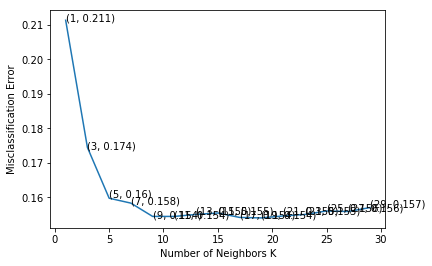


The optimal number of neighbors is 19.

the misclassification error for each k value is :  [0.211 0.174 0.16  0.158 0.154 0.154 0.155 0.155 0.154 0.154 0.155 0.155
 0.156 0.156 0.157]


In [11]:
# changing to misclassification error
print(cv_scores_w2v_kdtree)
MSE_kdtree = [1-x for x in cv_scores_w2v_kdtree] 

# plot misclassification error vs k 
plt.plot(neighbors, MSE_kdtree)

for xy in zip(neighbors, np.round(MSE_kdtree,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#computing optimal k
optimal_k_kdtree=neighbors[MSE_kdtree.index(min(MSE_kdtree))]

print('\nThe optimal number of neighbors is %d.' % optimal_k_kdtree)


print("\nthe misclassification error for each k value is : ", np.round(MSE_kdtree,3))

In [12]:
# instantiate learning model k = optimal_k
knn_optimal_kdtree = KNeighborsClassifier(n_neighbors=optimal_k_kdtree)

# fitting the model
knn_optimal_kdtree.fit(X_1, Y_1)

# predict the response
pred_kdtree = knn_optimal_kdtree.predict(X_test)

# evaluate accuracy
acc_kdtree = accuracy_score(Y_test, pred_kdtree) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_kdtree, acc_kdtree))


The accuracy of the knn classifier for k = 19 is 84.700000%


**INFERENCE**

*It seems that brute force algorithm has slightly more accuracy than kdtree in W2V vectors.*